## IMDB Top 1000 Movies Dataset 

The following dataset was used for this assignment: 
https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

The dataset contains information about the top 1000 movies on IMDB.

## 1. Initial Setup

**Import** the required packages:

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load** the data:

In [2]:
#load the data into a dataframe
path = 'data/imdb_top_1000.csv'
df_imdb_data_raw = pd.read_csv(path)
df_imdb_data_raw.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## 2. Data Wrangling

**Drop** unnecessary columns:

In [3]:
#drop columns that will not be used
df_imdb_data = df_imdb_data_raw.drop(['Poster_Link','Overview','No_of_Votes','Certificate', 'Meta_score'], axis=1)

**Examine the remaining columns:**


In [4]:
#check info on the remaining columns
df_imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   object 
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Director       1000 non-null   object 
 6   Star1          1000 non-null   object 
 7   Star2          1000 non-null   object 
 8   Star3          1000 non-null   object 
 9   Star4          1000 non-null   object 
 10  Gross          831 non-null    object 
dtypes: float64(1), object(10)
memory usage: 86.1+ KB


**Clean** the data:

In [5]:
#convert the Gross column to float
df_imdb_data['Gross'] = df_imdb_data['Gross'].str.replace(',','').astype(float)

In [6]:
#convert the Released_Year column to integer values
df_imdb_data['Released_Year'] = pd.to_numeric(df_imdb_data['Released_Year'], errors='coerce')

In [7]:
#check the movie title and set the correct value for the row with a missing release year
display(df_imdb_data[df_imdb_data['Released_Year'].isna()])
df_imdb_data.loc[966,'Released_Year'] = 1995

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4,Gross
966,Apollo 13,NaN,140 min,"Adventure, Drama, History",7.6,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,173837933.0


In [8]:
#convert Released_Year to datetime
df_imdb_data['Released_Year'] = pd.to_datetime(df_imdb_data['Released_Year'],format='%Y')

In [9]:
#Create a decade column
df_imdb_data['Decade'] = df_imdb_data['Released_Year'].dt.year // 10 * 10

In [10]:
#convert 'Runtime' column to an integer value
df_imdb_data['Runtime'] = df_imdb_data['Runtime'].str.replace(' min','').astype(int)
df_imdb_data.rename(columns={'Runtime':'Runtime (mins)'},inplace=True)
df_imdb_data.head()

,Series_Title,Released_Year,Runtime (mins),Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4,Gross,Decade
0,The Shawshank Redemption,1994-01-01,142,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,28341469.0,1990
1,The Godfather,1972-01-01,175,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,134966411.0,1970
2,The Dark Knight,2008-01-01,152,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,534858444.0,2000
3,The Godfather: Part II,1974-01-01,202,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,57300000.0,1970
4,12 Angry Men,1957-01-01,96,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,4360000.0,1950


Examine the **numerical columns**:

In [11]:
#check numerical columns
df_imdb_data.describe()

,Runtime (mins),IMDB_Rating,Gross,Decade
count,1000.000000,1000.000000,8.310000e+02,1000.000000
mean,122.891000,7.949300,6.803475e+07,1986.590000
std,28.093671,0.275491,1.097500e+08,23.177772
min,45.000000,7.600000,1.305000e+03,1920.000000
25%,103.000000,7.700000,3.253559e+06,1970.000000
50%,119.000000,7.900000,2.353089e+07,1990.000000
75%,137.000000,8.100000,8.075089e+07,2000.000000
max,321.000000,9.300000,9.366622e+08,2020.000000


Note that **Gross Income is missing values**

## 3. Data Exploration:

**Question:** How do movies with high **gross income** (representing commerical success) differ from movies with a high **IMDB rating** (representing quality)?


## 3.1 Explore Gross Income

**Question:** What are the **top 10 movies by gross income**?

In [12]:
#get the top 10 movies by gross income
df_top10_gross = df_imdb_data.sort_values(by='Gross',ascending=False).head(10)

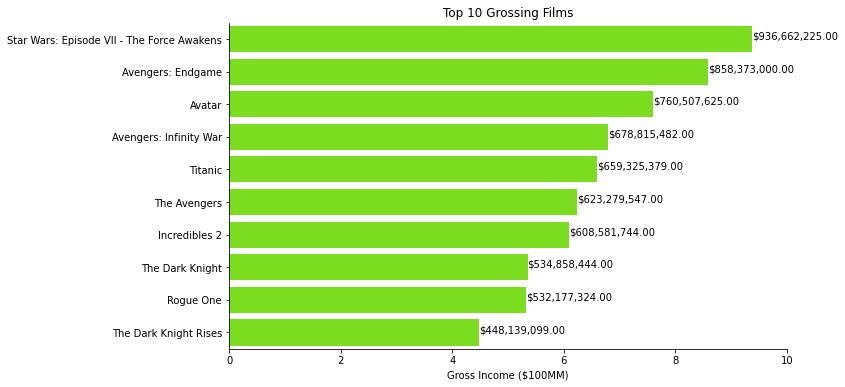

In [13]:
#plot the Gross Income for the Top 10 Grossing films
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_top10_gross,x='Gross',y='Series_Title', color='lawngreen');

ax.set_title('Top 10 Grossing Films');
ax.set_xlabel('Gross Income ($100MM)');
ax.set_xticks([0,2e8,4e8,6e8,8e8,10e8]);
ax.set_xticklabels([0,2,4,6,8,10]);
ax.set_ylabel(None);

#remove the top and right lines from the axis "box"
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)


#annotate the bars with the Gross Income
for patch in ax.patches:
    value = "${:,.2f}".format(patch.get_width())
    ax.annotate(value,
                    (patch.get_width(),patch.get_y() + patch.get_height()/2),)

**Interesting findings** from inspecting the top 10 grossing films:
* Nothing was particularly surprising
* However, all of the films are relatively **recent** with Titanic (1997) being the oldest
* Successful movie franchises tended to have multiple films in the top 10

**Discussion:**<br/>
* It is not surpising that high grossing films tend to be recent. This is likely due to inflation. Therefore, next we can examine how **gross income has changed over time.**

**Question:** How does **gross income fluctuate by decade**?

In [14]:
#get median and mean gross income by decade 
df_gross_notna = df_imdb_data[df_imdb_data['Gross'].notna()]
df_gross_decade_median = pd.DataFrame(df_gross_notna.groupby('Decade')['Gross'].median())
df_gross_decade_mean = pd.DataFrame(df_gross_notna.groupby('Decade')['Gross'].mean())

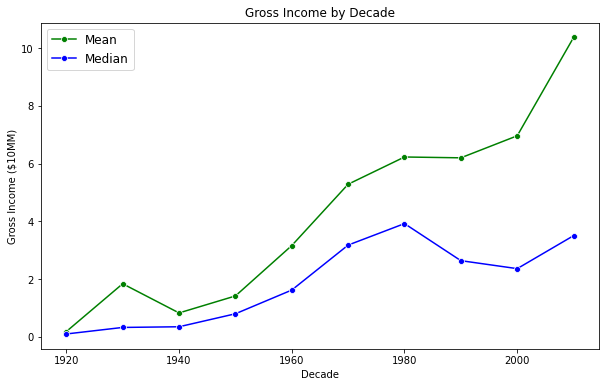

In [15]:
#plot the change in gross income by decade - mean and median
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_gross_decade_mean, x='Decade', y='Gross', color='green', marker="o", label='Mean');
sns.lineplot(data=df_gross_decade_median, x='Decade', y='Gross', color='blue', marker="o", label='Median');
ax.set_title('Gross Income by Decade');
ax.set_ylabel('Gross Income ($10MM)');
ax.set_yticks([0,2e7,4e7,6e7,8e7,10e7]);
ax.set_yticklabels([0,2,4,6,8,10]);
ax.legend(fontsize=12);

**Interesting findings** from exploring Gross Income by Decade:
* The trend in mean gross income was as expected - an upward trend over time was observed
* It was surprising that median gross income increased up until the 1980s and decreased until the end of the 2000s
* Mean gross income tended to be higher than median gross income throughout the decades.

**Discussion:**
* Mean gross income likely increased over the decades due to inflation. For later dates, the gross income earned by the most successful movies will be higher. These outlier films pull up the mean value resulting in the mean gross income trend seen on the chart.
* A possible explanation for median income peaking in the 1980s is that, with current technology, it is easier to produce films. This may result in a higher quantity of low budget, low gross income films. These films may be dragging down the median value. 
* Another possible explanation for median income peaking in the 1980s is that the dataset is biased towards more recent films. Fewer films from the 1980s would have been "remembered" in this dataset. The ones that were "remembered" would likely be the high grossing films (recency bias).
* The fact that mean gross income tends to be higher than the median is likely due to a small number of extremely successful films acting as outliers and increasing the mean value.

Since we suspect that recency bias in the dataset contributed to median gross income peaking in the 1980s, the next step can be to check the **number of movies by decade**.


**Question:** What is the **movie count by decade** in this dataset?

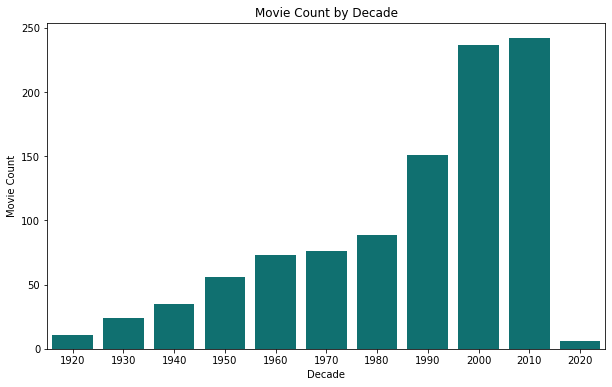

In [16]:
#plot the number of movies by decade
fig, ax = plt.subplots(figsize=(10,6))
data = pd.DataFrame(df_imdb_data.groupby('Decade')['Series_Title'].count())
sns.barplot(
    data = data,
    x = data.index,
    y = 'Series_Title',
    color='teal'
);
ax.set_title('Movie Count by Decade');
ax.set_ylabel('Movie Count');

**Observations:**
* The 2000s and 2010s decades each account for significantly more movies than any other decade
* As expected, the 2020s have few movies because we are still early in the decade
* There was a large jump in number of movies from the 1980s to 1990s and another large jump from the 1990s to 2000s. This could be due to technology making it easier to create movies, increasing demand, or simply recency bias in the dataset

**Question:** Which movie stars were in the highest grossing films?

In [17]:
#examine the gross income by movie stars 

#pull the star columns and melt the dataframe to make the data easier to work with
star_slice_columns = ['Series_Title','Gross','Star1','Star2','Star3','Star4']
df_star_slice = df_imdb_data[star_slice_columns]
df_star_slice = df_star_slice[df_star_slice['Gross'].notna()]
df_star_slice = df_star_slice.melt(id_vars=['Series_Title','Gross']) \
    .rename(columns={'variable':'Star_Number','value':'Star_Name'})

#get the top 10 grossing stars (by total gross income)
df_star_gross = pd.DataFrame(df_star_slice.groupby('Star_Name')['Gross'].sum()).sort_values(by='Gross',ascending=False)
df_star_gross_top10 = df_star_gross.head(10).reset_index()

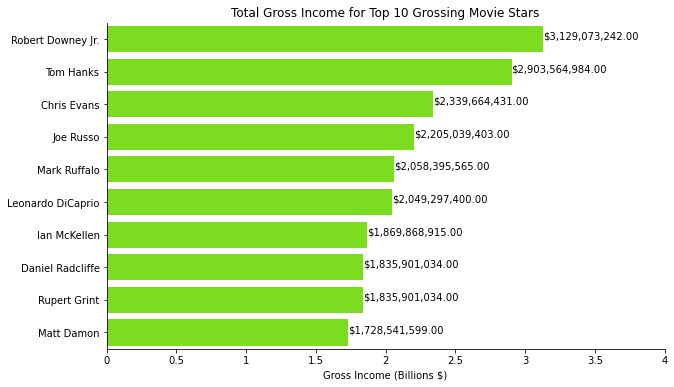

In [18]:
#plot the Gross Income for the top 10 grossing movie stars
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_star_gross_top10,x='Gross',y='Star_Name', color='lawngreen');

ax.set_title('Total Gross Income for Top 10 Grossing Movie Stars');
ax.set_xlabel('Gross Income (Billions $)');
ax.set_xticks([0,0.5e9,1e9,1.5e9,2e9,2.5e9,3e9,3.5e9,4e9]);
ax.set_xticklabels([0,0.5,1,1.5,2,2.5,3,3.5,4]);
ax.set_ylabel(None)

#remove the top and right lines from the axis "box"
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)


#annotate the bars with the Gross Income
for patch in ax.patches:
    value = "${:,.2f}".format(patch.get_width())
    ax.annotate(value,
                    (patch.get_width(),patch.get_y() + patch.get_height()/2),)

**Observations:**
* Robert Downey Jr. and Tom Hanks were in films that earned significantly more gross income than other stars

**Question:** What films (from this dataset) were **Robert Downey Jr. and Tom Hanks** in?

In [19]:
pd.DataFrame(df_star_slice[df_star_slice['Star_Name'] == 'Robert Downey Jr.']['Series_Title'])

,Series_Title
291,The Avengers
411,Iron Man
753,Sherlock Holmes
883,Avengers: Endgame
884,Avengers: Infinity War
1461,Zodiac
2135,Captain America: Civil War


In [20]:
pd.DataFrame(df_star_slice[df_star_slice['Star_Name'] == 'Tom Hanks']['Series_Title'])

,Series_Title
11,Forrest Gump
22,Saving Private Ryan
23,The Green Mile
86,Toy Story
132,Toy Story 3
485,Toy Story 4
492,Captain Phillips
531,Cast Away
654,Road to Perdition
679,Philadelphia


**Observations:**
* Robert Downey Jr. starred in fewer movies (from this dataset) than Tom Hanks. However, Robert Downey Jr. starred in several of top 10 highest grossing movies.
* Tom Hanks did not star in any of the top 10 highest grossing movies. However, the movies he starred in had a high total gross income because he starred in a high quantity of movies.

**Question:** How did **gross income vary by genre**?

In [21]:
#examine gross income by genre

#split the genre columns and melt the dataframe so that each movie has a row for each genre
genre_slice_columns = ['Series_Title','Gross','Genre']
df_genre_gross = df_gross_notna[genre_slice_columns]
df_genre_expanded = df_genre_gross['Genre'].str.replace(' ','').str.split(',',expand=True)\
    .rename(columns={0:'Genre_1',1:'Genre_2',2:'Genre_3'})
df_genre_gross = pd.merge(df_genre_gross, df_genre_expanded, left_index=True,right_index=True).drop('Genre',axis=1)
df_genre_gross = df_genre_gross.melt(id_vars=['Series_Title','Gross'])\
    .rename(columns={'variable':'Genre_Number', 'value':'Genre'})\
    .dropna()


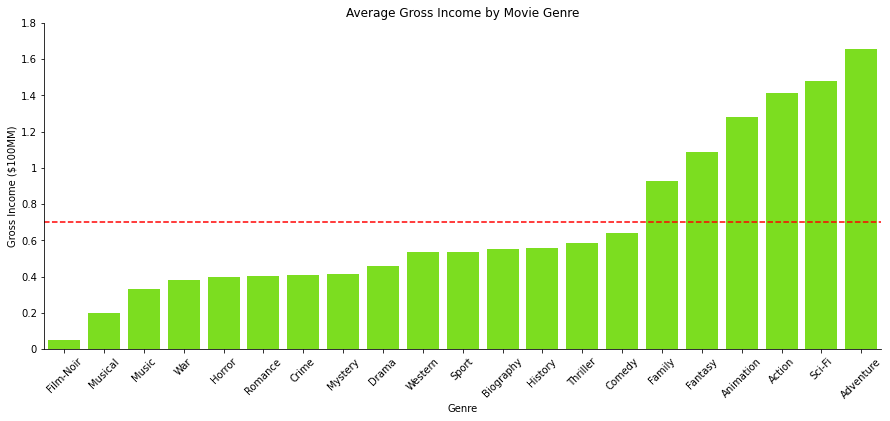

In [22]:
#plot the average Gross Income by genre

data = pd.DataFrame(df_genre_gross.groupby('Genre')['Gross'].mean()).sort_values(by='Gross').reset_index()
fig, ax = plt.subplots(figsize=(15,6))
bar_graph = sns.barplot(data=data, x='Genre',y='Gross', color='lawngreen');
ax.set_title('Average Gross Income by Movie Genre');

#settings of the axes
ax.set_ylabel('Gross Income ($100MM)');
ax.set_yticks([0,0.2e8,0.4e8,0.6e8,0.8e8,1e8,1.2e8,1.4e8,1.6e8,1.8e8]);
ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8]);
ax.set_xlabel('Genre')
ax.tick_params(axis='x', rotation=45)
ax.axhline(y=70000000, linestyle='--',color='red')


#remove the top and right lines from the axis "box"
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
    

**Observations**:
* Film-Noir movies had the lowest mean gross income. However, this may be due to Film-Noir movies being from earlier decades. 
* Adventure was the highest grossing genre on average.
* The Family, Fantasy, Animation, Action, Sci-Fi, and Adventure genres were significantly higher grossing than other genres.
* It should be noted that many movies had multiple genres. Therefore, their gross income will count towards multiple genres.

## 3.2 Explore IMDB rating

**Question:** What are the **top 10 movies by IMDB rating**?

In [23]:
#get the top 10 movies by IMDB rating
df_top10_rating = df_imdb_data.sort_values(by='IMDB_Rating',ascending=False).head(10)

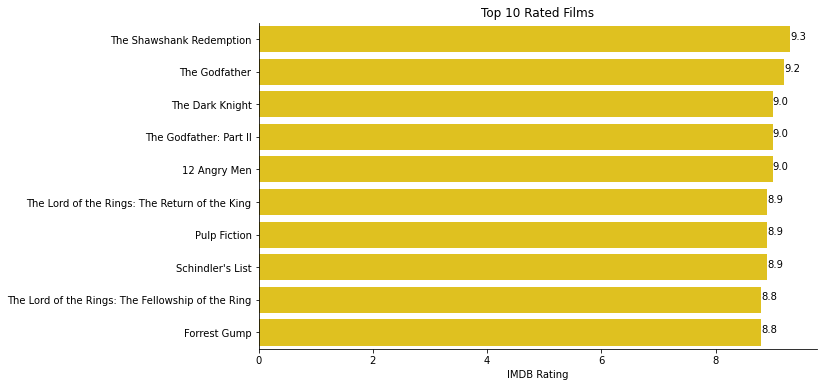

In [24]:
#plot the Gross Income for the Top 10 Grossing films
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_top10_rating,x='IMDB_Rating',y='Series_Title', color='gold');

ax.set_title('Top 10 Rated Films');
ax.set_xlabel('IMDB Rating');
ax.set_ylabel(None);

#remove the top and right lines from the axis "box"
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)


#annotate the bars with the Gross Income
for patch in ax.patches:
    value = patch.get_width()
    ax.annotate(value,
                    (patch.get_width(),patch.get_y() + patch.get_height()/2),)

**Observations:**
* The Dark Knight is the only movie that was in the top 10 for both gross income and IMDB rating. It can therefore be considered a great movie in terms of both commerical success and quality.
* Unlike the highest grossing films, a wide range of decades are represented in the highest rated films (**see below**)

In [25]:
#Display the decade for the top 10 highest rated movies
df_top10_rating[['Series_Title','Decade']].sort_values(by='Decade')

,Series_Title,Decade
4,12 Angry Men,1950
1,The Godfather,1970
3,The Godfather: Part II,1970
0,The Shawshank Redemption,1990
6,Pulp Fiction,1990
7,Schindler's List,1990
11,Forrest Gump,1990
2,The Dark Knight,2000
5,The Lord of the Rings: The Return of the King,2000
10,The Lord of the Rings: The Fellowship of the Ring,2000


**Question:** How does **rating fluctuate by decade**?

In [26]:
#get median and mean rating by decade 
df_rating_decade_median = pd.DataFrame(df_imdb_data.groupby('Decade')['IMDB_Rating'].median())
df_rating_decade_mean = pd.DataFrame(df_imdb_data.groupby('Decade')['IMDB_Rating'].mean())

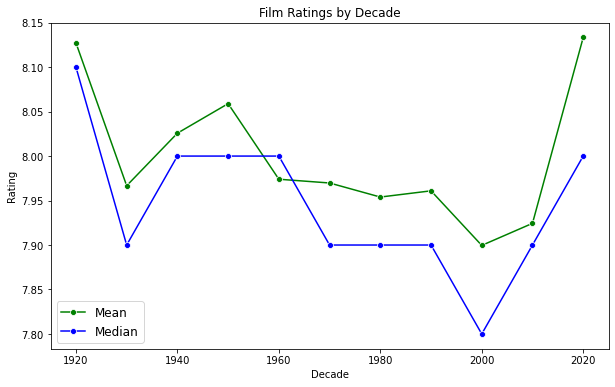

In [27]:
#plot the trend in film ratings by decade - mean and median
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df_rating_decade_mean, x='Decade', y='IMDB_Rating', color='green', marker="o", label='Mean');
sns.lineplot(data=df_rating_decade_median, x='Decade', y='IMDB_Rating', color='blue', marker="o", label='Median');
ax.set_title('Film Ratings by Decade');
ax.set_ylabel('Rating');
ax.legend(fontsize=12);

**Observations:**
* The ratings were very high for 1920s films. This is likely because the only films from the 1920s that are "remembered" are the highest quality ones (survivorship bias). Another explanation could be that, due to technological limitations, film studios had to focus on quality over quantity.
* In general, there was a downward trend in rating from the 1950s to 2000s. The decrease can likely be explained by survivorship bias decreasing as we approach the present.
* There was a sharp upward trend in rating from the 2000s to 2020s. Further investigation would be required to explain this.

**Question:** Which movie stars were in the highest rated films?

In [28]:
#examine the rating by movie stars 

#pull the star columns and melt the dataframe to make the data easier to work with
star_slice_columns = ['Series_Title','IMDB_Rating','Star1','Star2','Star3','Star4']
df_star_slice = df_imdb_data[star_slice_columns]
df_star_slice = df_star_slice.melt(id_vars=['Series_Title','IMDB_Rating']) \
    .rename(columns={'variable':'Star_Number','value':'Star_Name'})


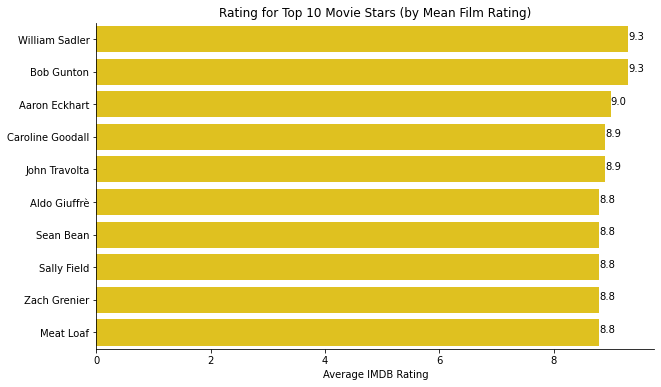

In [29]:
#plot the Ratings for the top 10 movie stars by average film rating

#get the top 10 move stars by mean movie rating
df_star_rating = pd.DataFrame(df_star_slice.groupby('Star_Name')['IMDB_Rating'].mean())\
    .sort_values(by='IMDB_Rating',ascending=False)
df_star_rating_top10 = df_star_rating.head(10).reset_index()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_star_rating_top10,x='IMDB_Rating',y='Star_Name', color='gold');

ax.set_title('Rating for Top 10 Movie Stars (by Mean Film Rating)');
ax.set_xlabel('Average IMDB Rating');
ax.set_ylabel(None)

#remove the top and right lines from the axis "box"
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)


#annotate the bars with the IMDB Rating
for patch in ax.patches:
    value = patch.get_width()
    ax.annotate(value,
                    (patch.get_width(),patch.get_y() + patch.get_height()/2),)

**Observations:**
* These movie stars are not as high profile as would be expected for the highest rated movies. 

**Question:** Is it possible that these movie stars acted in only a single movie that happened to be very highly rated?

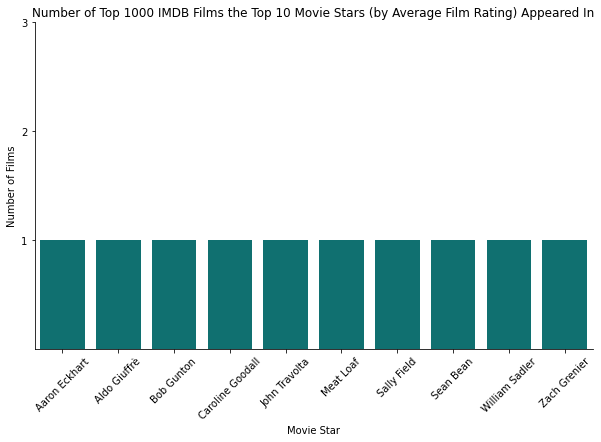

In [30]:
#How many of the top 1000 IMDB films did these actors appear in?

df_star_film_count = pd.DataFrame(df_star_slice[df_star_slice['Star_Name'].isin(df_star_rating_top10['Star_Name'].tolist())] \
    .groupby('Star_Name')['Series_Title'].count())
df_star_film_count.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_star_film_count,x='Star_Name',y='Series_Title', color='teal');
ax.tick_params(axis='x', rotation=45)
ax.set_title('Number of Top 1000 IMDB Films the Top 10 Movie Stars (by Average Film Rating) Appeared In')
ax.set_yticks([1,2,3]);
ax.set_ylabel('Number of Films');
ax.set_xlabel('Movie Star')

#remove the top and right lines from the axis "box"
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)


**Observations:**
* As expected, each of these movie stars appeared in a single movie (from this dataset) which happend to be highly rated.

**Question:** Would it be more effective to look at the top 10 movie stars by total (sum) film rating?

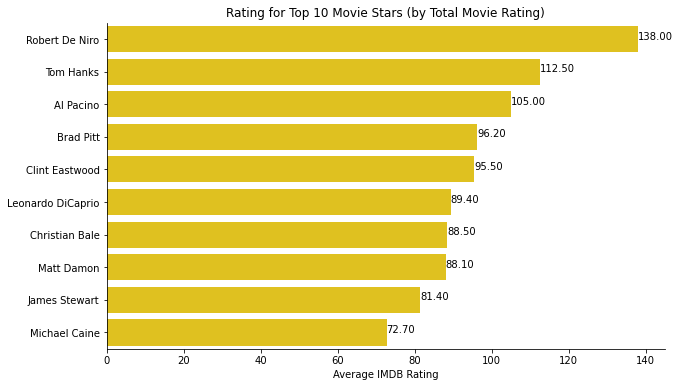

In [31]:
#plot the Ratings for the top 10 movie stars by total (sum) film rating


#get the top 10 move stars by total movie rating
df_star_rating = pd.DataFrame(df_star_slice.groupby('Star_Name')['IMDB_Rating'].sum())\
    .sort_values(by='IMDB_Rating',ascending=False)
df_star_rating_top10 = df_star_rating.head(10).reset_index()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_star_rating_top10,x='IMDB_Rating',y='Star_Name', color='gold');

ax.set_title('Rating for Top 10 Movie Stars (by Total Movie Rating)');
ax.set_xlabel('Average IMDB Rating');
ax.set_ylabel(None)

#remove the top and right lines from the axis "box"
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)


#annotate the bars with the IMDB Rating
for patch in ax.patches:
    value = "{:,.2f}".format(patch.get_width())
    ax.annotate(value,
                    (patch.get_width(),patch.get_y() + patch.get_height()/2),)

**Observations:**
* This list is more in line with expectations: higher profile stars appear in the highest rated movies.
* However, the problem with using each star's total (sum) rating is that a star could have a high cumulative rating if they appeared in a large number of movies with lower ratings.

**Question:** Did these stars appear in high rated movies or just a lot of movies?

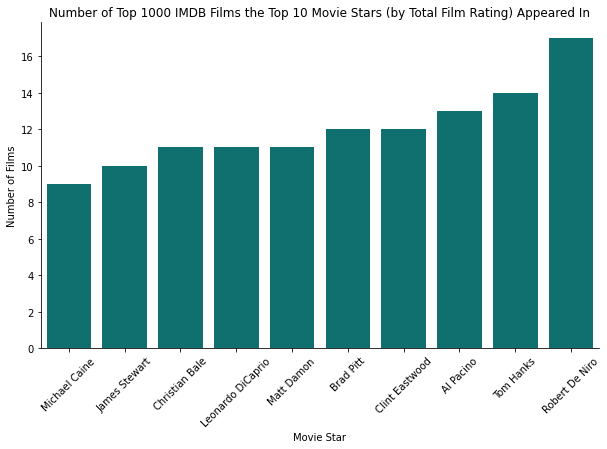

In [32]:
#How many of the top 1000 IMDB films did these actors appear in?

df_star_film_count = pd.DataFrame(df_star_slice[df_star_slice['Star_Name'].isin(df_star_rating_top10['Star_Name'].tolist())] \
    .groupby('Star_Name')['Series_Title'].count())
df_star_film_count.reset_index(inplace=True)
df_star_film_count.sort_values(by='Series_Title', inplace=True)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df_star_film_count,x='Star_Name',y='Series_Title', color='teal');
ax.tick_params(axis='x', rotation=45)
ax.set_title('Number of Top 1000 IMDB Films the Top 10 Movie Stars (by Total Film Rating) Appeared In')
ax.set_ylabel('Number of Films');
ax.set_xlabel('Movie Star')

#remove the top and right lines from the axis "box"
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)


**Observations:**
* Although the order is not identical, the number of movies the star appeared in contributes heavily to their position on the total rating list

**Question:** How did **rating vary by genre**?

In [33]:
#examine ratinge by genre

#split the genre columns and melt the dataframe so that each movie has a row for each genre
rating_slice_columns = ['Series_Title','IMDB_Rating','Genre']
df_genre_rating = df_imdb_data[rating_slice_columns]
df_genre_expanded = df_genre_rating['Genre'].str.replace(' ','').str.split(',',expand=True)\
    .rename(columns={0:'Genre_1',1:'Genre_2',2:'Genre_3'})
df_genre_rating = pd.merge(df_genre_rating, df_genre_expanded, left_index=True,right_index=True).drop('Genre',axis=1)
df_genre_rating = df_genre_rating.melt(id_vars=['Series_Title','IMDB_Rating'])\
    .rename(columns={'variable':'Genre_Number', 'value':'Genre'})\
    .dropna()

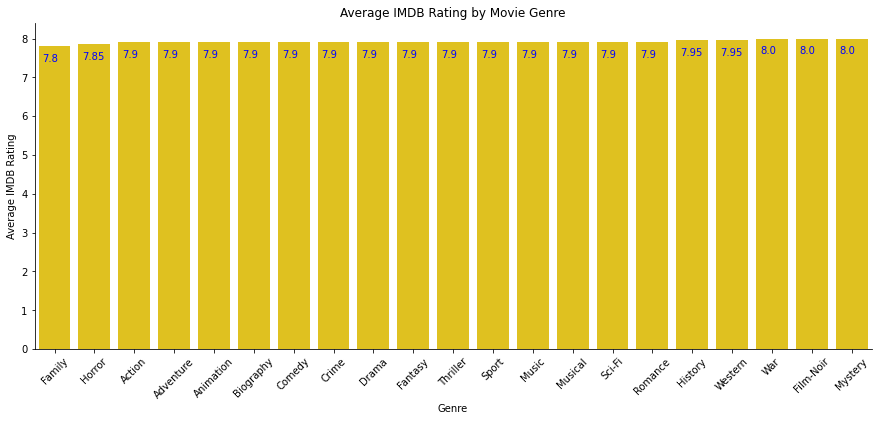

In [34]:
#plot the average IMDB Rating by genre

data = pd.DataFrame(df_genre_rating.groupby('Genre')['IMDB_Rating'].median()).sort_values(by='IMDB_Rating').reset_index()
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=data, x='Genre',y='IMDB_Rating', color='gold');
ax.set_title('Average IMDB Rating by Movie Genre');

#settings of the axes
ax.set_ylabel('Average IMDB Rating');
ax.set_xlabel('Genre')
ax.tick_params(axis='x', rotation=45)


#remove the top and right lines from the axis "box"
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)
    
#annotate the bars with the IMDB Rating
for patch in ax.patches:
    value = patch.get_height()
    ax.annotate(value,
        (patch.get_x() + patch.get_width()/8 ,patch.get_y() + patch.get_height() * (19/20)),
         color='blue'      )

**Observations:** 
* Surprisingly, average rating was near identical across all genres. This differed significantly from gross income, which depended heavily on genre. However, this does make sense. Some genres will be much more popular in the mass market leading to differing gross incomes. On the other hand, a movie can be high quality (or low quality) regardless of the genre. 

## 4. Conclusions

The goal was to explore how movies with high gross income (representing commerical success) differ from movies with a high IMDB rating (representing quality):

**4.1 Top 10:**
* The top 10 grossing movies differed significantly from the top 10 rated movies - commercial success is not necessarily an indicator of movie quality.
* The Dark Knight was the only movie on both top 10 lists. This indicated that it was both commerically successful and a high quality movie.

**4.2 Gross Income and Rating by Decade:**
* The top grossing movies tended to be recent while the highest rated movies came from many different decades.
* Mean gross income tended to increase over time
* Mean rating generally decreased until the end of the 2000s (possibly due to survivorship bias). It then increased rapidly from the end of the 2000s to present.
* Median rating followed the same general trend as the mean rating. However, the median gross income differed from the mean gross income. Median gross income peaked in the 1980s.

**4.3 Movie Stars:**
* The movie stars in high grossing films tended to be different from those in highly rated films.
* However, Tom Hanks, Leonardo DiCaprio, and Matt Damon were among the top 10 stars for both high grossing and highly rated films. This indicates that they have appeared in both commercially successful and high quality films. If you are selecting a film based on actor, these actors may be good choices.

**4.4 Genre:**
* Genre seemed to have a significant impact on average gross income. The Family, Fantasy, Animation, Action, Sci-Fi, and Adventure genres were significantly higher grossing than other genres. The Adventure genre was the highest grossing.
* Genre seemed to have no impact on average movie rating. This makes sense because a high (or low) quality movie can be made in any genre.